# Author - Anand K

# SPARK FOUDATION - TASK 3

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## As a business manager, try to find out the weak areas where you can work to make more profit.

## What all business problems you can derive by exploring the data?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape

(9994, 13)

In [5]:
data.duplicated().sum()

17

In [6]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)
data.shape

(9977, 13)

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Analyzing Features

In [8]:
print('Ship Modes:',data['Ship Mode'].unique())
print('Segments:',data['Segment'].unique())
print('Countries:',data['Country'].nunique())
print('Cities:',data['City'].nunique())
print('States:',data['State'].nunique())
print('Regions:',data['Region'].unique())
print('Categories:',data['Category'].unique())
print('Sub-Categories:',data['Sub-Category'].nunique())
print('Quantities:',data['Quantity'].nunique())

Ship Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segments: ['Consumer' 'Corporate' 'Home Office']
Countries: 1
Cities: 531
States: 49
Regions: ['South' 'West' 'Central' 'East']
Categories: ['Furniture' 'Office Supplies' 'Technology']
Sub-Categories: 17
Quantities: 14


### Correlation

In [48]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


## Heatmap

<AxesSubplot:>

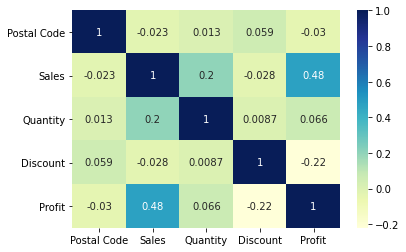

In [47]:
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)

## EDA

## Countplot

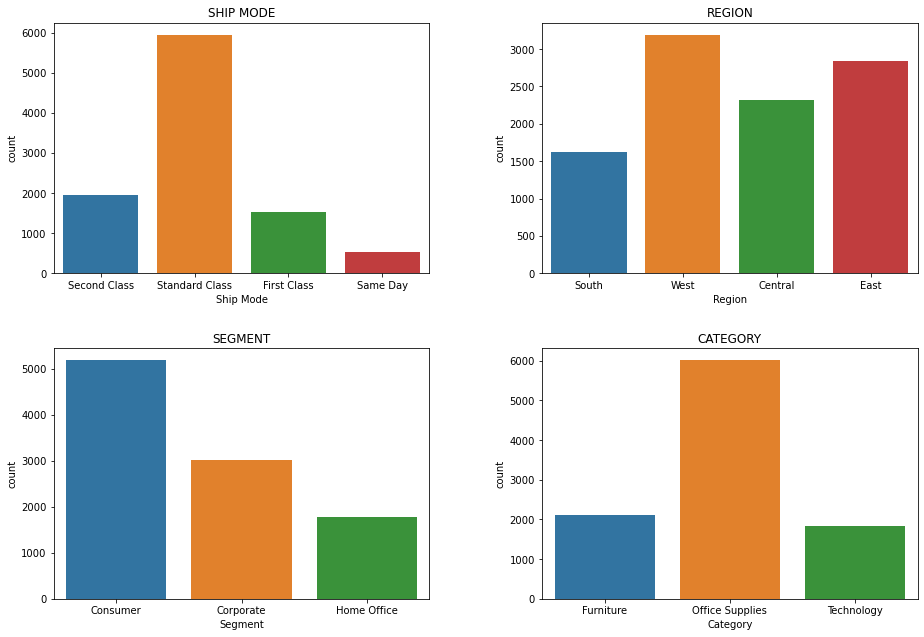

In [49]:
plt.figure(figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

plt.subplot(2,2,1)
plt.title('SHIP MODE')
sns.countplot(data = data, x = 'Ship Mode')

plt.subplot(2,2,2)
plt.title('REGION')
sns.countplot(data = data, x = 'Region')

plt.subplot(2,2,3)
plt.title('SEGMENT')
sns.countplot(data = data, x = 'Segment')

plt.subplot(2,2,4)
plt.title('CATEGORY')
sns.countplot(data = data, x = 'Category')

plt.show()

<AxesSubplot:title={'center':'STATE'}, xlabel='State', ylabel='count'>

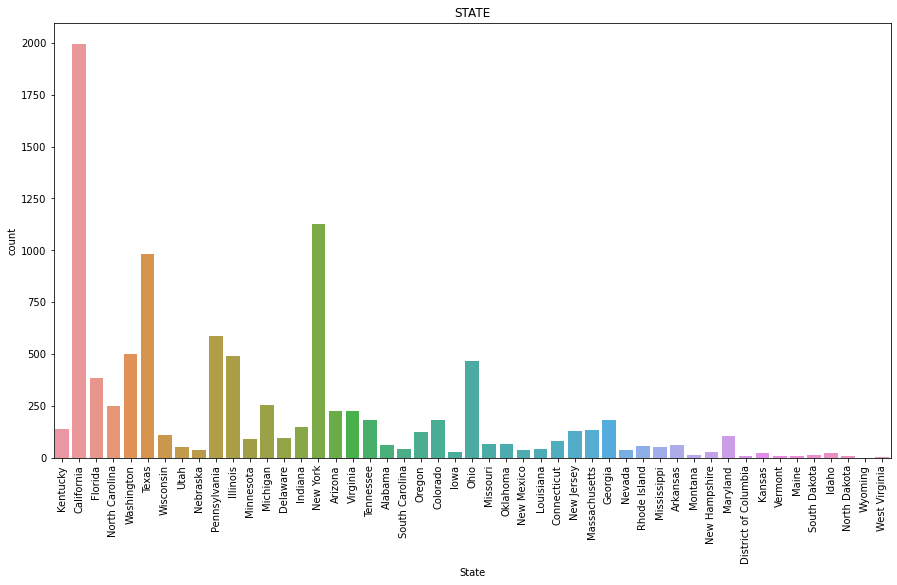

In [39]:
plt.figure(figsize = (15,8))
plt.title('STATE')
plt.xticks(rotation = 90)
sns.countplot(data = data, x = 'State')

<AxesSubplot:title={'center':'SUB-CATEGORY'}, xlabel='Sub-Category', ylabel='count'>

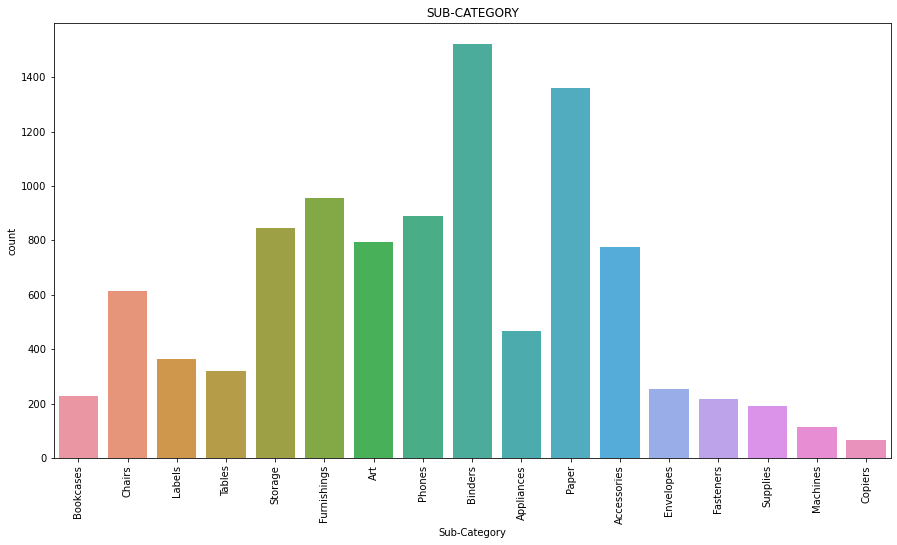

In [42]:
plt.figure(figsize = (15,8))
plt.title('SUB-CATEGORY')
plt.xticks(rotation = 90)
sns.countplot(data = data, x = 'Sub-Category')

## Pairplot

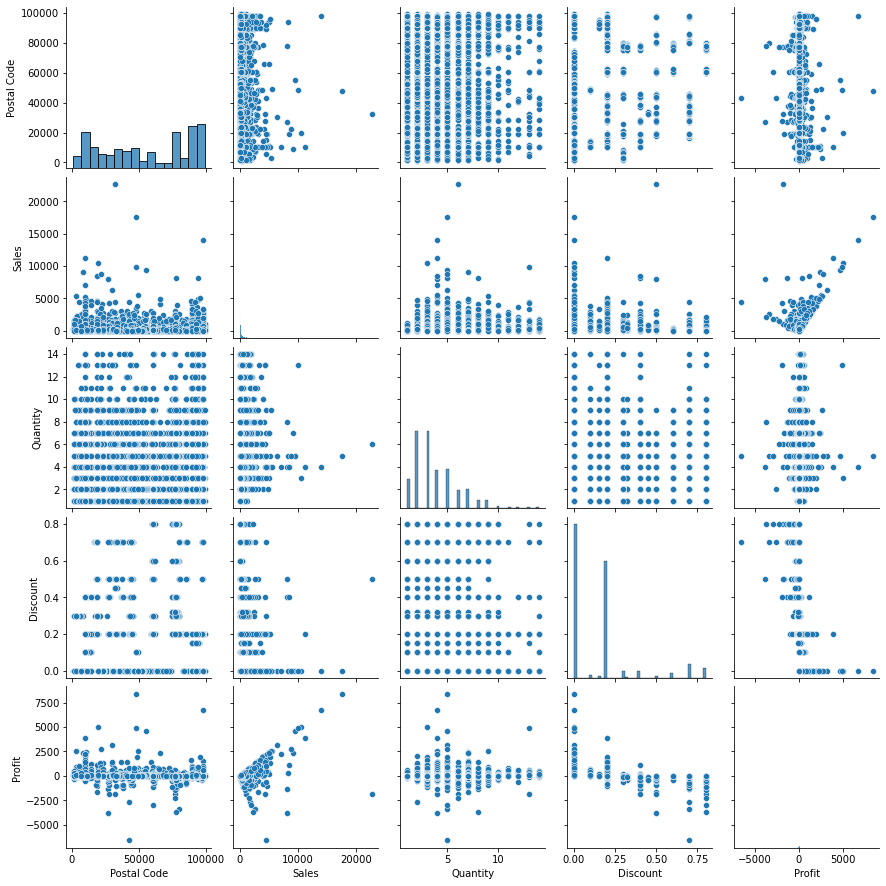

In [52]:
sns.pairplot(data)

## Scatterplot

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

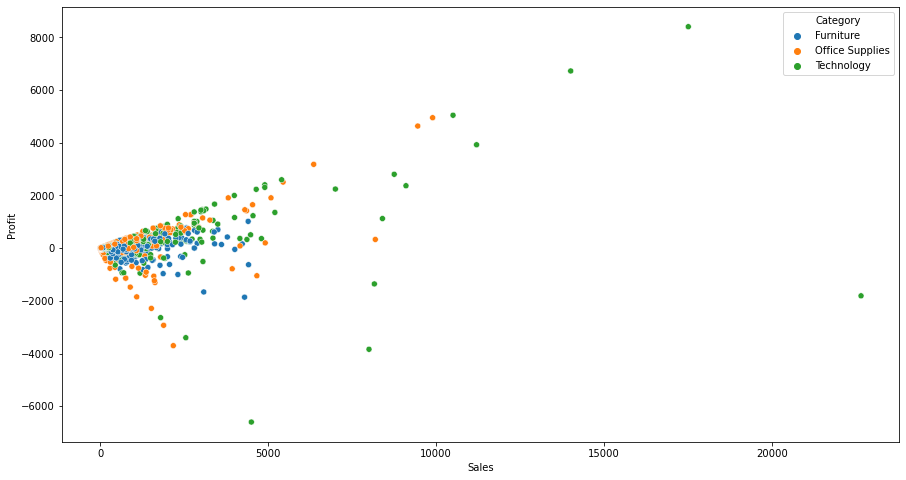

In [61]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = data, x = 'Sales', y = 'Profit', hue = 'Category')

## Barplot

In [9]:
ship_mode = data.groupby('Ship Mode')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
segments = data.groupby('Segment')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
states = data.groupby('State')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
regions = data.groupby('Region')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
categories = data.groupby('Category')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
sub_categories = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)
quantities = data.groupby('Quantity')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False)

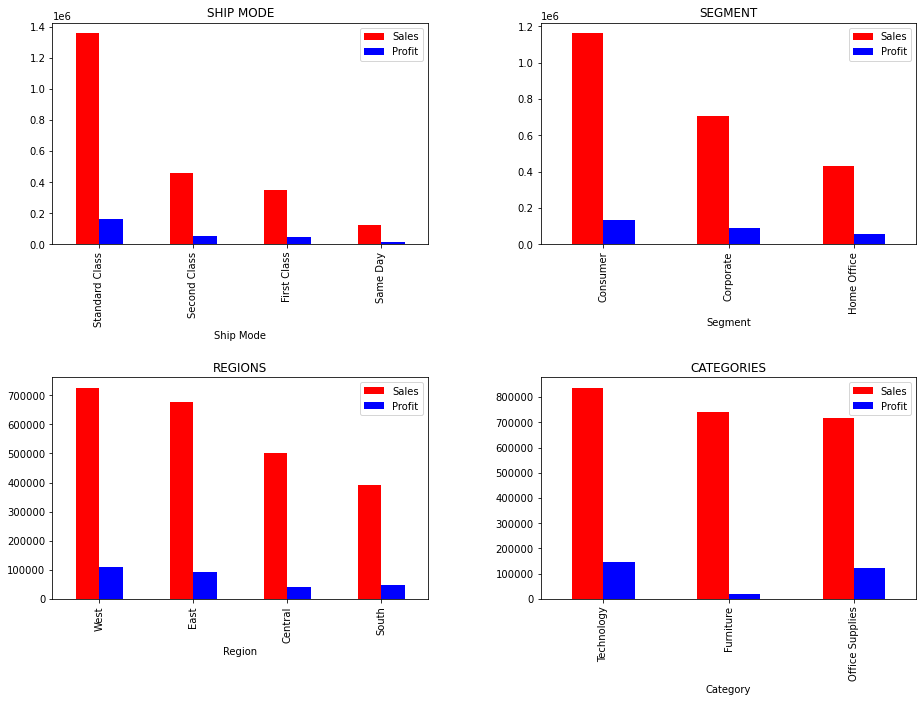

In [10]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.6)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ship_mode.plot(kind = 'bar', color = ['red','blue'], ax = ax1, title = 'SHIP MODE')
segments.plot(kind = 'bar', color = ['red','blue'], ax = ax2, title = 'SEGMENT')
regions.plot(kind = 'bar', color = ['red','blue'], ax = ax3, title = 'REGIONS')
categories.plot(kind = 'bar', color = ['red','blue'], ax = ax4, title = 'CATEGORIES')

plt.show()

1. Standard class of Ship mode earns more profit
2. Consumer segment has more profit
3. Maximum profit comes from West region
4. Technology holds the maximum profit in Category

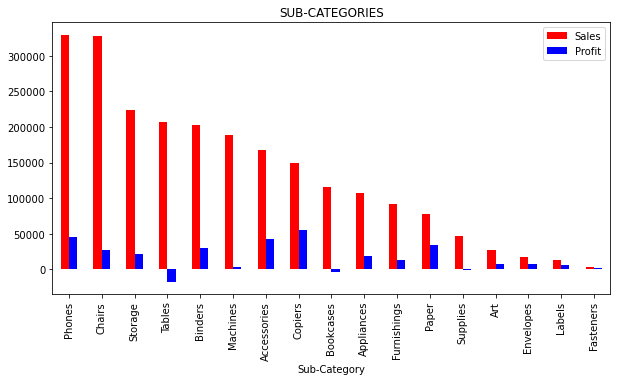

In [11]:
sub_categories.plot(kind = 'bar', color = ['red','blue'], title = 'SUB-CATEGORIES', figsize = (10,5))
plt.show()

1. Phones are the maximum profit with sales around 350000
2. Tables are the maximum negative profit with sales around 205000

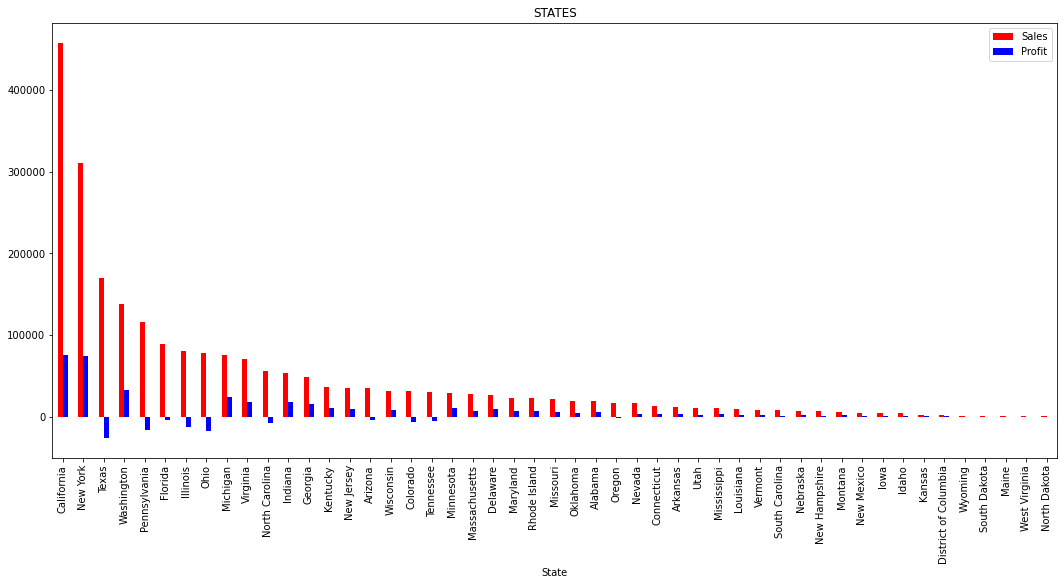

In [12]:
states.plot(kind = 'bar', color = ['red','blue'], title = 'STATES', figsize = (18,8))
plt.show()

1. Sales in california is maximum, but newyork has equivalent profit with minimum sales
2. Negative Profit states are Texas, Pennsylvania, Florida, Illinois, Ohio and other few states

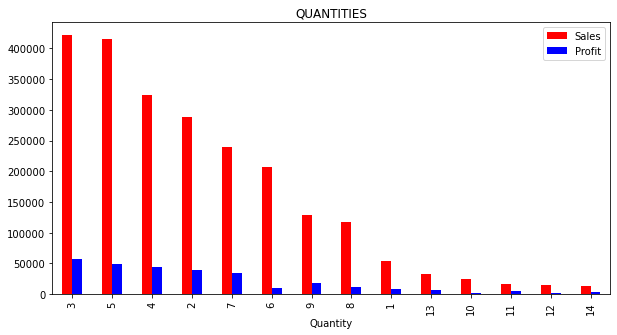

In [13]:
quantities.plot(kind = 'bar', color = ['red','blue'], title = 'QUANTITIES', figsize = (10,5))
plt.show()

Sales is maximum for lesser quantities

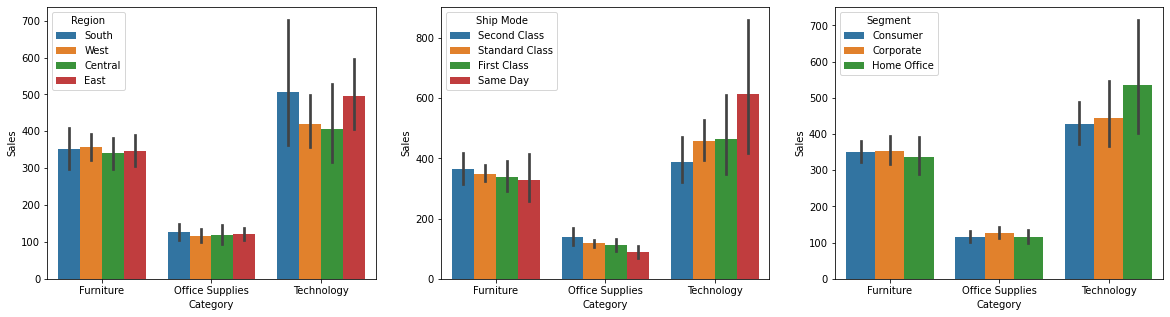

In [14]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(data = data, x = 'Category', y = 'Sales', hue = 'Region')

plt.subplot(1,3,2)
sns.barplot(data = data, x = 'Category', y = 'Sales', hue = 'Ship Mode')

plt.subplot(1,3,3)
sns.barplot(data = data, x = 'Category', y = 'Sales', hue = 'Segment')

plt.show()

1. Sales of all categories is maximum in South region
2. Furniture & Office Supplies is maximum in Second class ship mode but Technology is maximum in same day ship mode
3. Furniture & Office Supplies is maximum in Corporate segment but Technology is maximum in Home Office Segment

## Regplot

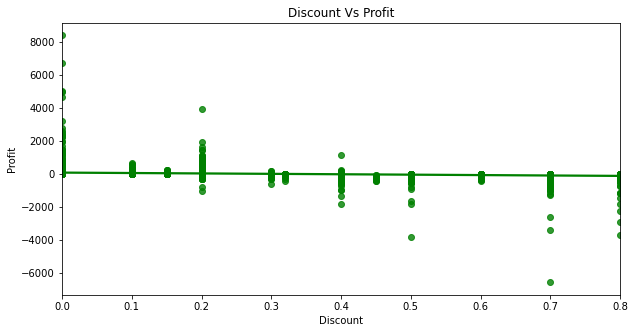

In [15]:
plt.figure(figsize = (10,5))
sns.regplot(data = data, x = 'Discount', y ='Profit', color = 'green')
plt.title('Discount Vs Profit')
plt.show()

Profit goes down when discount is greater than 0.2. Discount affects the profit

#### Statewise discount having Negative Profit

In [16]:
state_discount = data.groupby('State')[['Sales','Profit','Discount']].sum().sort_values(by = 'Sales', ascending = False)
state_discount['Discount'][state_discount['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

#### Sub-Category discount having Negative Profit

In [17]:
subcat_discount = data.groupby('Sub-Category')[['Sales','Profit','Discount']].sum().sort_values(by = 'Sales', ascending = False)
subcat_discount['Discount'][subcat_discount['Profit'] < 0].sort_values(ascending = True)

Sub-Category
Supplies     14.60
Bookcases    48.14
Tables       83.35
Name: Discount, dtype: float64

#### Negative Profit data

In [18]:
lose = data[data['Profit'] < 0]
lose.reset_index(drop = True, inplace = True)
lose

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
2,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
3,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
1865,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
1866,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
1867,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


<AxesSubplot:xlabel='Category'>

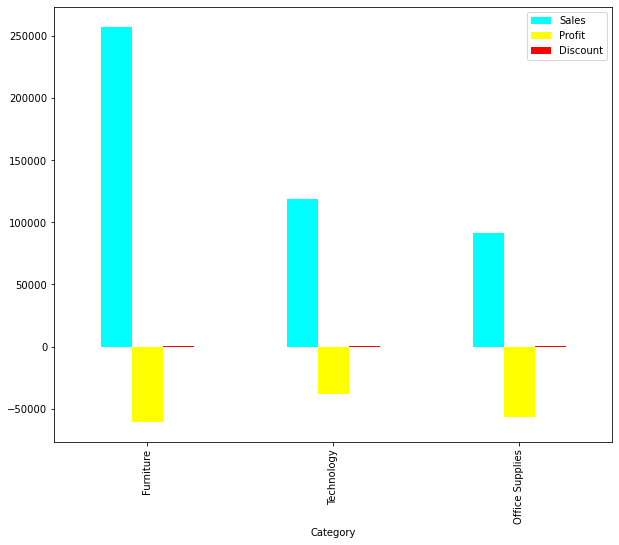

In [19]:
cat_lose = lose.groupby('Category')[['Sales','Profit','Discount']].sum().sort_values(by = 'Sales', ascending = False)
cat_lose.plot(kind = 'bar', color = ['cyan','yellow','red'], figsize = (10,8))
plt.show()

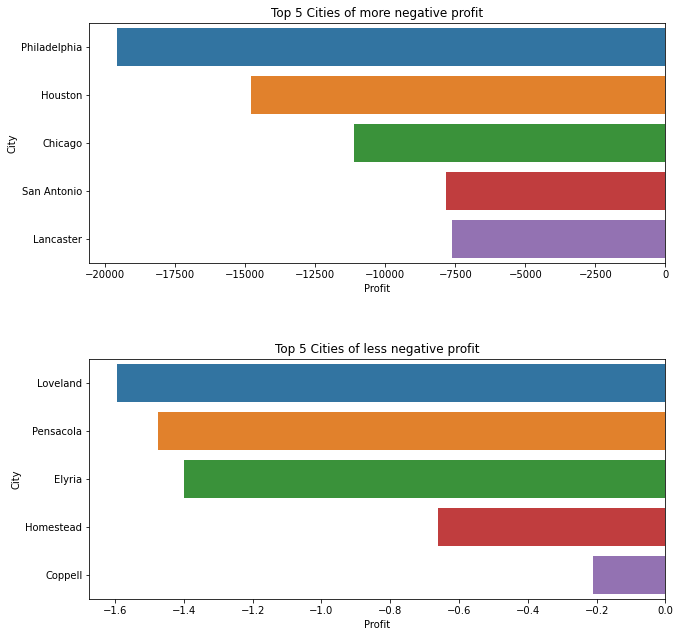

In [20]:
cities = lose.groupby('City').sum().sort_values(by = 'Profit').reset_index()
fig = plt.figure(figsize = (10,10))

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title('Top 5 Cities of more negative profit')
ax2.set_title('Top 5 Cities of less negative profit')

sns.barplot(y = cities['City'].head(), x = cities['Profit'].head(), ax = ax1)
sns.barplot(y = cities['City'].tail(), x = cities['Profit'].tail(), ax = ax2)

plt.show()

Philadelphia has the most negative profit & Coppell has the least negative profit

#### Zero Profit Data

In [21]:
zero_profit = data[data['Profit'] == 0]
zero_profit.reset_index(drop = True, inplace = True)
zero_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Home Office,United States,Tampa,Florida,33614,South,Furniture,Furnishings,258.072,3,0.2,0.0
1,Second Class,Consumer,United States,San Francisco,California,94110,West,Furniture,Chairs,1121.568,2,0.2,0.0
2,First Class,Consumer,United States,Seattle,Washington,98105,West,Office Supplies,Fasteners,3.960,2,0.0,0.0
3,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Furniture,Chairs,451.152,3,0.2,0.0
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,1228.465,5,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,First Class,Consumer,United States,Los Angeles,California,90036,West,Furniture,Chairs,2803.920,5,0.2,0.0
61,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Storage,204.900,5,0.0,0.0
62,Standard Class,Consumer,United States,Lafayette,Indiana,47905,Central,Office Supplies,Fasteners,5.940,3,0.0,0.0
63,Standard Class,Consumer,United States,Fairfield,Ohio,45014,East,Furniture,Furnishings,82.640,2,0.2,0.0


The following steps to be taken to make more profit:

1. More profit comes from Standard class ship mode. So, we can increase sales by Standard Class ship mode.

2. Increase in customer segment gains more profit.

3. States with high sales giving negative profit due to Discount. Also,We should focus on states with minimum sales and minimum profit.

4. West region profit is maximum. So, we should increase the sales. On comparing central & south region, South region earns more profit than central. It is better to increase sales in South region.

5. In category, Technology gains more profit, we should focus on increasing that product.

6. In sub-category, Copiers profit is high but sales is low. We should increase sales on Copiers. Tables, Bookcases & Supplies profits are very low. So, decreasing sales on these three can reduce loss.

7. Discount is inversely proportional to profit, so better to reduce discount.